**Locating** the CV Files

In [1]:
import os
files=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files+=[os.path.join(dirname, filename)]
files

['/kaggle/input/cvresume/debika_piriya_dharmalingam - debika piriya.pdf',
 '/kaggle/input/cvresume/23.pdf',
 '/kaggle/input/cvresume/25.pdf',
 '/kaggle/input/cvresume/31.pdf',
 '/kaggle/input/cvresume/30.pdf',
 '/kaggle/input/cvresume/24.pdf',
 '/kaggle/input/cvresume/15.pdf',
 '/kaggle/input/cvresume/5.pdf',
 '/kaggle/input/cvresume/29.pdf',
 '/kaggle/input/cvresume/8.pdf',
 '/kaggle/input/cvresume/14.pdf',
 '/kaggle/input/cvresume/17.pdf',
 '/kaggle/input/cvresume/27.pdf',
 '/kaggle/input/cvresume/20.pdf',
 '/kaggle/input/cvresume/26.pdf',
 '/kaggle/input/cvresume/12.pdf',
 '/kaggle/input/cvresume/4.pdf',
 '/kaggle/input/cvresume/19.pdf',
 '/kaggle/input/cvresume/1.pdf',
 '/kaggle/input/cvresume/10.pdf',
 '/kaggle/input/cvresume/22.pdf',
 '/kaggle/input/cvresume/21.pdf',
 '/kaggle/input/cvresume/32.pdf',
 '/kaggle/input/cvresume/28.pdf',
 '/kaggle/input/cvresume/33.PDF',
 '/kaggle/input/cvresume/13.pdf',
 '/kaggle/input/cvresume/16.pdf',
 '/kaggle/input/cvresume/35.pdf',
 '/kaggle/in

Installing PyPDF2

In [2]:
!pip install PyPDF2
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 968.3 kB/s eta 0:00:00


Importing PyPDF2 and Others

In [3]:
from PyPDF2 import PdfReader
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')   

# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)
reader = PdfReader("/kaggle/input/cvresume/debika_piriya_dharmalingam - debika piriya.pdf")

text=reader.pages[0].extract_text()
text

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


' Debika piriya Dharmalingam Contact no.:9080686399 Email: debika.piriyad@gmail.com Linkedin:www.linkedin.com/in/debikapiriya-dharmalingam I’m a growth oriented individual who is currently pursuing bachelors in IT and actively looking for internship opportunities in the software development field. I love to logically think and critically analyze the given problem and crack the solution. I’m an active self learner and believe in improvising the world through my knowledge  ● EDUCATION ○ Bachelors of Technology, BTech —information technology ,2020-2024           Sri Siva Subramaniya Nadar college of Engineering,SSNCE ○ Higher secondary education(class 12) 2018-2020,Chennai public school ○ High school(class 10) 2018, Everwin Vidhyashram     ● TEST SCORES ○ Btech (till 3rd semester)- 9.3 cgpa ○ Class 12- 480/500 ○ Class 10- 474/500-Secured school first  ○ JEE- 89.967 percentile( overall India)   ● PROJECTS ○ Map navigator for optimal traverse: ■ (2022)- 4th semester ■ Used python libraries,

# Importing Spacy for NLP processing and tokenising CV text

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc=nlp(text)
doc

 Debika piriya Dharmalingam Contact no.:9080686399 Email: debika.piriyad@gmail.com Linkedin:www.linkedin.com/in/debikapiriya-dharmalingam I’m a growth oriented individual who is currently pursuing bachelors in IT and actively looking for internship opportunities in the software development field. I love to logically think and critically analyze the given problem and crack the solution. I’m an active self learner and believe in improvising the world through my knowledge  ● EDUCATION ○ Bachelors of Technology, BTech —information technology ,2020-2024           Sri Siva Subramaniya Nadar college of Engineering,SSNCE ○ Higher secondary education(class 12) 2018-2020,Chennai public school ○ High school(class 10) 2018, Everwin Vidhyashram     ● TEST SCORES ○ Btech (till 3rd semester)- 9.3 cgpa ○ Class 12- 480/500 ○ Class 10- 474/500-Secured school first  ○ JEE- 89.967 percentile( overall India)   ● PROJECTS ○ Map navigator for optimal traverse: ■ (2022)- 4th semester ■ Used python libraries,H

# Preprocessing our text:

1. **Removing unnecessary tokens that we do not need:**
We do not need punctuation, currency, digits, spaces, stopwords, and anything which is not alphabetical. Hence we should remove them. We also remove single letters.
2. **Lemmatising while adding word tokens to list:** 
While appending the tokens we are appending the word lemma, this way we ensure that we arent introducing two different words meaning the same.
3. **We use set datastructure to create unique keywords only:** This is done by list(set(_variable_name_)) method

> This entire process is done by create_tokens() function

In [5]:
tokens=[]
def create_tokens(doc):
    tokens=[]
    for token in doc:
        if not token.is_punct and not token.is_currency and not token.is_digit and not token.is_space and not token.is_stop and not token.like_num and token.is_alpha and len(token)>1:
#             print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.shape_, token.is_alpha, token.is_stop)
            tokens.append(token.lemma_)

    tokens=list(set(tokens))
    return tokens
tokens=create_tokens(doc)
print(tokens)

['improvise', 'High', 'till', 'Project', 'path', 'Everwin', 'destination', 'love', 'openstreet', 'Contact', 'navigator', 'email', 'high', 'general', 'Technology', 'orient', 'technology', 'dharmalingam', 'school', 'attempt', 'input', 'self', 'Linkedin', 'Bachelors', 'opportunity', 'dijistra', 'growth', 'percentile', 'solution', 'knowledge', 'secondary', 'traverse', 'India', 'look', 'software', 'public', 'piriya', 'widely', 'learner', 'Nadar', 'python', 'Debika', 'short', 'individual', 'map', 'algorithm', 'html', 'logically', 'believe', 'overall', 'visit', 'BTech', 'debikapiriya', 'Siva', 'Map', 'actively', 'SCORES', 'critically', 'PROJECTS', 'pursue', 'Class', 'cgpa', 'library', 'SSNCE', 'description', 'analyze', 'source', 'development', 'semester', 'structure', 'folium', 'user', 'EDUCATION', 'Engineering', 'crack', 'Sri', 'TEST', 'prefer', 'give', 'field', 'bachelor', 'data', 'think', 'college', 'Btech', 'Subramaniya', 'secure', 'internship', 'use', 'information', 'Dharmalingam', 'opti

# Preprocessing tokens for Multiple Files

In this section, we do the following
1. We read each pdf file. 
2. Tokenise each of them using the create_tokens() function.
3. Print them.

In [6]:
import pandas as pd
df=pd.DataFrame()
tokenized=[]
for file in files:
#     print('\n'+file+'\n')
    reader = PdfReader(file)
    text=reader.pages[0].extract_text()
    doc=nlp(text)
    tokens=create_tokens(doc)
#     tokenized=pd.Series(tokenizer.encode(tokens, add_special_tokens=True))
    tokenized=tokenizer.encode(tokens, add_special_tokens=True)
#     print(tokenized)
    data={'File':file,'Tokens':tokenized}
    df=df.append(data,ignore_index = True)
       
df.head(len(files))   

,File,Tokens
0,/kaggle/input/cvresume/debika_piriya_dharmalin...,"[101, 100, 100, 6229, 100, 4130, 100, 7688, 22..."
1,/kaggle/input/cvresume/23.pdf,"[101, 100, 2613, 100, 100, 100, 4613, 100, 100..."
2,/kaggle/input/cvresume/25.pdf,"[101, 4145, 100, 2476, 10616, 7427, 100, 4044,..."
3,/kaggle/input/cvresume/31.pdf,"[101, 100, 2946, 3191, 100, 100, 2612, 3857, 1..."
4,/kaggle/input/cvresume/30.pdf,"[101, 100, 100, 100, 100, 2110, 3716, 100, 304..."
5,/kaggle/input/cvresume/24.pdf,"[101, 100, 100, 100, 2613, 100, 100, 100, 100,..."
6,/kaggle/input/cvresume/15.pdf,"[101, 5396, 100, 100, 4613, 5368, 100, 7561, 1..."
7,/kaggle/input/cvresume/5.pdf,"[101, 4145, 100, 2640, 100, 100, 100, 2393, 10..."
8,/kaggle/input/cvresume/29.pdf,"[101, 7705, 100, 100, 3034, 3857, 100, 2732, 1..."
9,/kaggle/input/cvresume/8.pdf,"[101, 100, 100, 7017, 100, 100, 100, 100, 100,..."


# Data Visualisation of token frequency

**1. Finding frequency of tokens:**
 Using collections module we find the frequency of tokens in a dictionary

In [7]:
import collections

all_tokens=[]
for file in files:
    reader = PdfReader(file)
    text=reader.pages[0].extract_text()
    doc=nlp(text)
    tokens=create_tokens(doc)
    all_tokens+=tokens
    
# We are sure there are many tokens which are occurring more than once
# Generate a 'Counter' dictionary of all such tokens with values being their number of occurrences
frequency= collections.Counter(all_tokens)

print(frequency)

Counter({'Engineering': 21, 'College': 19, 'CGPA': 17, 'skill': 16, 'Python': 14, 'learn': 14, 'Tamil': 14, 'work': 13, 'high': 12, 'objective': 12, 'language': 12, 'school': 11, 'knowledge': 11, 'India': 11, 'Science': 11, 'School': 11, 'Sri': 10, 'project': 10, 'opportunity': 9, 'development': 9, 'team': 9, 'SSN': 9, 'Secondary': 9, 'Electronics': 9, 'EDUCATION': 8, 'problem': 8, 'Machine': 8, 'Learning': 8, 'programming': 8, 'career': 8, 'Development': 8, 'Chennai': 8, 'Computer': 8, 'web': 8, 'solve': 8, 'student': 8, 'University': 8, 'SKILLS': 8, 'Nadar': 7, 'field': 7, 'college': 7, 'English': 7, 'develop': 7, 'Madurai': 7, 'CSS': 7, 'education': 7, 'Java': 7, 'organization': 7, 'good': 7, 'State': 7, 'XII': 7, 'management': 7, 'complete': 7, 'COLLEGE': 7, 'engineering': 7, 'QUALIFICATION': 7, 'technology': 6, 'self': 6, 'secondary': 6, 'python': 6, 'individual': 6, 'PROJECTS': 6, 'Language': 6, 'Programming': 6, 'SQL': 6, 'HTML': 6, 'course': 6, 'experience': 6, 'Bachelor': 6, '

2. **Data Visualisation:**
Using Matplotlib we plot a bar plot with the common 85 tokens

{'Engineering': 21, 'College': 19, 'CGPA': 17, 'skill': 16, 'Python': 14, 'learn': 14, 'Tamil': 14, 'work': 13, 'high': 12, 'objective': 12, 'language': 12, 'school': 11, 'knowledge': 11, 'India': 11, 'Science': 11, 'School': 11, 'Sri': 10, 'project': 10, 'opportunity': 9, 'development': 9, 'team': 9, 'SSN': 9, 'Secondary': 9, 'Electronics': 9, 'EDUCATION': 8, 'problem': 8, 'Machine': 8, 'Learning': 8, 'programming': 8, 'career': 8, 'Development': 8, 'Chennai': 8, 'Computer': 8, 'web': 8, 'solve': 8, 'student': 8, 'University': 8, 'SKILLS': 8, 'Nadar': 7, 'field': 7, 'college': 7, 'English': 7, 'develop': 7, 'Madurai': 7, 'CSS': 7, 'education': 7, 'Java': 7, 'organization': 7, 'good': 7, 'State': 7}


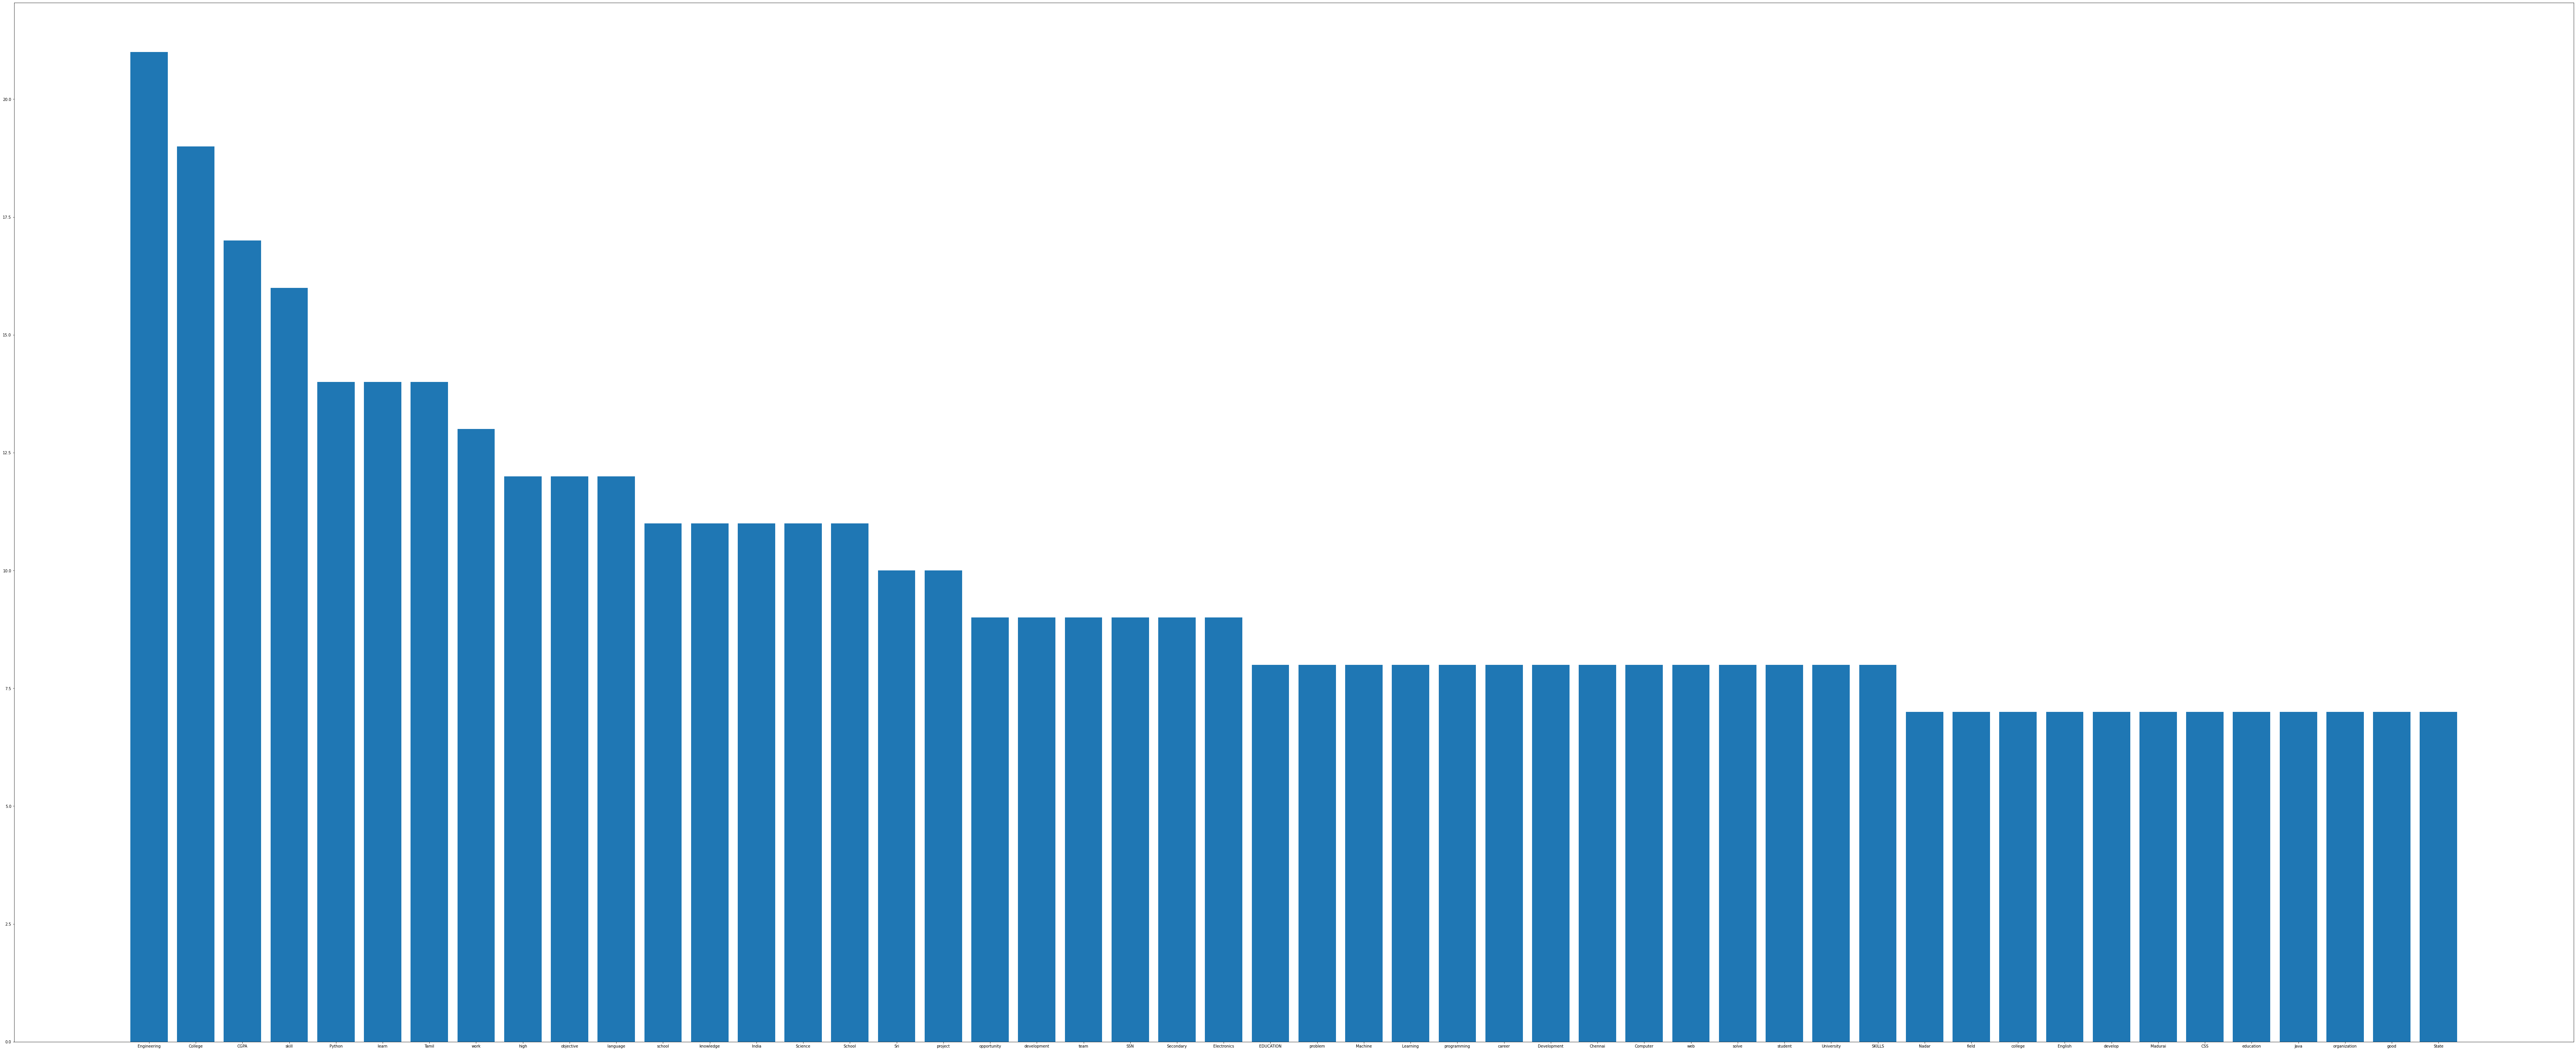

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (120,50)

common_frequency=dict(frequency.most_common(50))
print(common_frequency)

keys=list(common_frequency.keys())
values=list(common_frequency.values())

plt.bar(range(len(common_frequency)),values, tick_label=keys)
plt.show()

# Adding 25 more Keywords

We add 25 more keywords and with 100 word features, we will develop a ML model for classifying good CVs.

In [9]:
user_keywords=['arduino','eclipse','raspberry pi','electric vehicle technology','electric vehicle','autonomous vehicle technology','matlab','openscada','microsoft azure iot kits','microsoft azure','devicehive ','devicehub','tessel','kinoma','analytics','api','aws','big data','busines intelligence','clustering','code','coding','data','database','data mining','data science','deep learning','hadoop','hypothesis test','iot','internet','machine learning','modeling','nosql','nlp','predictive','programming','python','r','sql','tableau','text mining','visualuzation','regression','unity','vuforia','wikitude','Enklu','bigdata','administration','agile','budget','cost','direction','feasibility analysis','finance','kanban','leader','leadership','management','milestones','planning','pmi','pmp','problem','project','risk','schedule','scrum','stakeholders''devops','deep learning','machine learning','artificial intelligence','tensorflow', 'mlflow','numpy','pytorch','keras','pandas','classification','metrics','r','scikit','weka','knime','ml','ai','flutter','api','dart','kotlin','java','android studio','git','react','vue js','react js','express js','node','npm','jenkins','xamarin','docker','flask','django','javascript','selenium','postgresql','mongodb','mysql','python','angular js','mern stack','mean stack','selenium','xcode',]
all_keywords=list(common_frequency)
all_keywords+=user_keywords

print("Length of all keywords:\t",len(all_keywords),end='\n\n')
print(all_keywords)

Length of all keywords:	 166

['Engineering', 'College', 'CGPA', 'skill', 'Python', 'learn', 'Tamil', 'work', 'high', 'objective', 'language', 'school', 'knowledge', 'India', 'Science', 'School', 'Sri', 'project', 'opportunity', 'development', 'team', 'SSN', 'Secondary', 'Electronics', 'EDUCATION', 'problem', 'Machine', 'Learning', 'programming', 'career', 'Development', 'Chennai', 'Computer', 'web', 'solve', 'student', 'University', 'SKILLS', 'Nadar', 'field', 'college', 'English', 'develop', 'Madurai', 'CSS', 'education', 'Java', 'organization', 'good', 'State', 'arduino', 'eclipse', 'raspberry pi', 'electric vehicle technology', 'electric vehicle', 'autonomous vehicle technology', 'matlab', 'openscada', 'microsoft azure iot kits', 'microsoft azure', 'devicehive ', 'devicehub', 'tessel', 'kinoma', 'analytics', 'api', 'aws', 'big data', 'busines intelligence', 'clustering', 'code', 'coding', 'data', 'database', 'data mining', 'data science', 'deep learning', 'hadoop', 'hypothesis test

# Using  BERT Model for prediction
Installing Transformers for BERT Model

In [10]:
import numpy as np
max_len = 0
for i in df['Tokens']:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in df['Tokens']])

print(padded)
np.array(padded).shape

[[  101   100   100 ...     0     0     0]
 [  101   100  2613 ...     0     0     0]
 [  101  4145   100 ...     0     0     0]
 ...
 [  101   100 14125 ...     0     0     0]
 [  101   100   100 ...   100   100   102]
 [  101   100   100 ...     0     0     0]]


(32, 220)

In [11]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)
    
features = last_hidden_states[0][:,0,:].numpy()

print(features)

[[-0.29298982 -0.09550267  0.0370551  ... -0.19995363  0.2361896
   0.24851884]
 [-0.18260035 -0.04608003  0.06167796 ... -0.12193196  0.23484784
   0.22968186]
 [-0.23330516 -0.17743954 -0.09522503 ... -0.11328023  0.20885743
   0.09813882]
 ...
 [-0.12256203  0.06657626  0.00891171 ... -0.08576306  0.2651151
   0.09257162]
 [-0.1834341   0.14949983  0.06752267 ... -0.1958358   0.25175616
   0.02784571]
 [-0.25169227  0.04531458 -0.10750173 ... -0.08643235  0.30166754
   0.1750189 ]]
